In [1]:
from bs4 import BeautifulSoup
import requests
import json
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def scrap(link) : 
    r = requests.get(link)
    soup = BeautifulSoup(r.text , 'html.parser')
    testo = soup.get_text()

    indice = testo.find('risultati')
    parola = [testo[indice -8] , testo[indice -7] , testo[indice -6] , testo[indice -5] , testo[indice -4] , testo[indice -3] , testo[indice -2]]
    numero = []
    for i in range(len(parola)) : 
        try :
            numero.append(float(parola[i]))
        except :
            risultato = 0

    risultato = 0
    for i in range(len(numero)) : 
        risultato += numero[i] * 10**(len(numero)-i-1)

    return risultato

In [3]:
url1 = 'https://ricerca.repubblica.it/ricerca/repubblica-extra?query=emissioni+gas+serra&fromdate=' 
url2 = '-01-01&todate='
url3 = '-12-31&sortby=score&author=&mode=any&filter_type=articolo'
risultati = []
anni = []
for i in range(1984 , 2022 , 1) : 
    risultati.append(scrap(url1+str(i)+url2+str(i)+url3))


anni = np.linspace(1984,2022,2022-1984)
print(sum(risultati))

52024.0


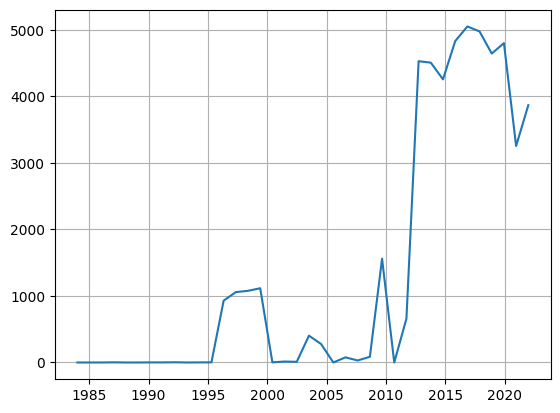

In [5]:
plt.grid()
plt.plot(anni , risultati)